In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np

In [5]:
os.listdir('.')

['.ipynb_checkpoints',
 'Apps',
 'car_data',
 'desktop.ini',
 'Discord.lnk',
 'glimpses.lnk',
 'ML',
 'Random',
 'settings',
 'Titanic',
 'titanic.zip',
 'Untitled.ipynb',
 'Waste of Time']

In [6]:
path_to_fol = "car_data"
path_test = path_to_fol + "/test"
path_train = path_to_fol + "/train"

In [7]:
try:
    del data
except Exception:
    pass

In [8]:
data = ImageDataBunch.from_folder(path_to_fol, train='train', valid='test', size=224, bs=32).normalize(imagenet_stats)

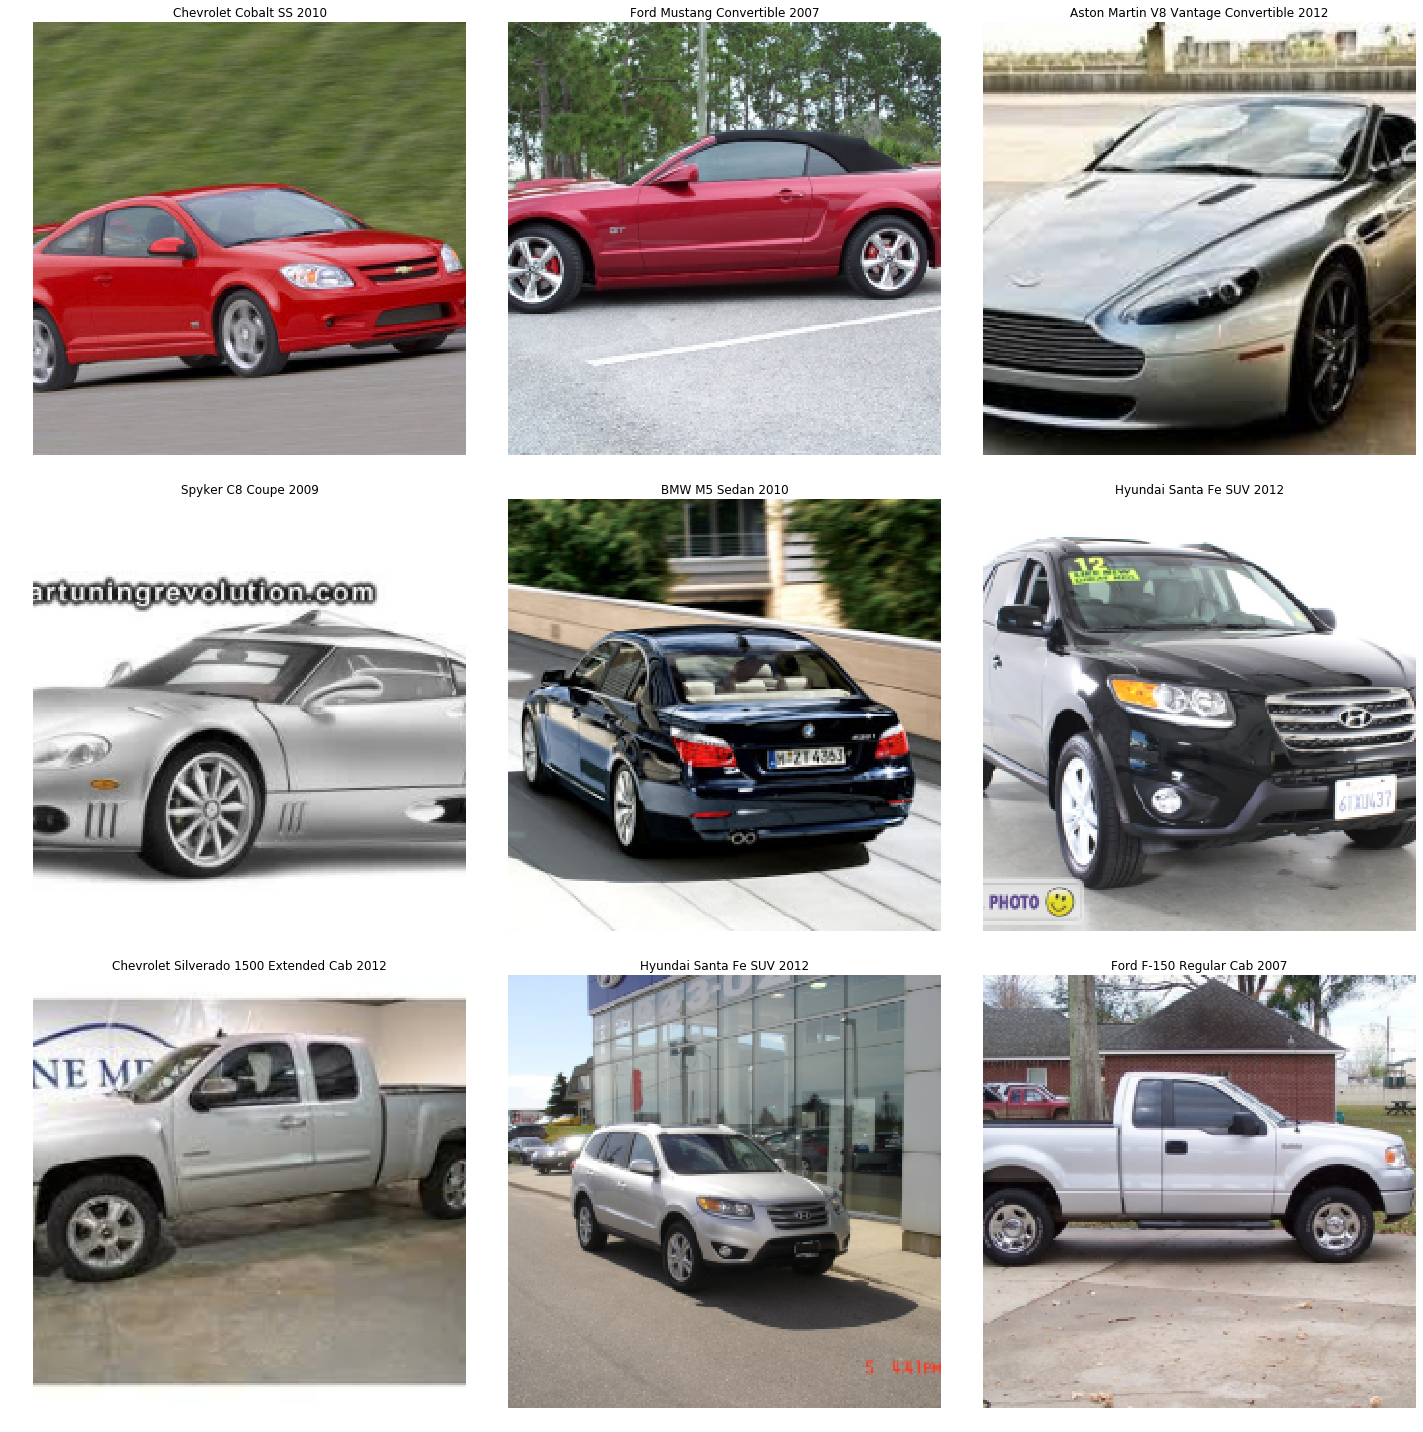

In [11]:
data.show_batch(rows=3, figsize=(20,20))

In [10]:
try:
    del learn
except Exception:
    pass

In [12]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to C:\Users\Peter/.cache\torch\checkpoints\resnet50-19c8e357.pth
100%|██████████████████████████████████████████████████████████████| 102502400/102502400 [00:03<00:00, 32132586.13it/s]


In [13]:
learn.fit_one_cycle(4, max_lr=3e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,3.882802,3.019094,0.297849,0.702151,04:17
1,2.388116,1.834181,0.518344,0.481657,03:55
2,1.290268,1.224239,0.672678,0.327322,03:52
3,0.712532,1.092270,0.704763,0.295237,03:50


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-06


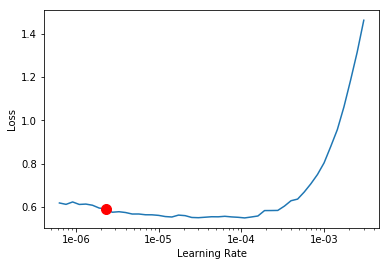

In [14]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [16]:
learn.fit_one_cycle(4, max_lr=slice(5e-6, 3e-4))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.612965,1.071512,0.716204,0.283796,04:02
1,0.488241,0.947444,0.748663,0.251337,04:02
2,0.199980,0.868232,0.765949,0.234050,04:02
3,0.114439,0.848011,0.767566,0.232434,04:02


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06


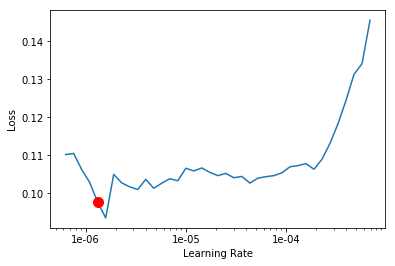

In [17]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [18]:
learn.fit_one_cycle(4, max_lr=slice(1.32E-06, 3e-4))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.109967,0.873435,0.763338,0.236662,04:02
1,0.102115,0.884127,0.761597,0.238403,04:02
2,0.071379,0.851323,0.770675,0.229325,04:02
3,0.042060,0.837475,0.774406,0.225594,04:02
